In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
import seaborn as sns
import pandas as pd
from pprint import pprint

from simulacion.simulate import simulate

In [2]:
def process_data(
    kits_fabricados_por_anio,
    cant_pedidos_resueltos_por_anio,
    cant_pedidos_sin_resolver_por_anio,
    pedidos_resueltos_por_mes,
    pedidos_sin_resolver_por_mes,
    pedidos_resueltos_por_dia,
    pedidos_sin_resolver_por_dia,
    disponibilidad
):
    
#     print(f"pedidos_resueltos_por_mes = {pedidos_resueltos_por_mes}")
    data = {}
    for d in disponibilidad:
        for k in d.keys():
            if k in data:
                data[k] += d[k]
            else:
                data[k] = 0
                
    df_disponibilidad = pd.DataFrame({"valor": tuple(data.values())}, index=tuple(data.keys()))
    ax_disponibilidad = df_disponibilidad.plot.pie(y="valor", figsize=(14,6))
    ax_disponibilidad.set_title("Cantidad de operarios disponibles a lo largo de la simulación")
    ax_disponibilidad.set_ylabel("Cantidad de minutos")
    ax_disponibilidad.set_xlabel("Días de simulación")
    
    df_pedidos_por_dia = pd.DataFrame({"Pedidos resueltos por día": pedidos_resueltos_por_dia, "Pedidos sin resolver por día": pedidos_sin_resolver_por_dia})
    ax_pedidos_por_dia = df_pedidos_por_dia.plot.line()
    ax_pedidos_por_dia.set_title("Pedidos resueltos y sin resolver (por día)")
    
    df_pedidos_por_mes = pd.DataFrame({"Pedidos resueltos por mes": pedidos_resueltos_por_mes, "Pedidos sin resolver por mes": pedidos_sin_resolver_por_mes})
    ax_pedidos_por_mes = df_pedidos_por_mes.plot.line()
    ax_pedidos_por_mes.set_title("Pedidos resueltos y sin resolver (por mes)")
    
    df_pedidos_por_anio = pd.DataFrame({"Pedidos resueltos por año": [cant_pedidos_resueltos_por_anio], "Pedidos sin resolver por año": [cant_pedidos_sin_resolver_por_anio]})
    ax_pedidos_por_anio = df_pedidos_por_anio.plot.bar()
    ax_pedidos_por_anio.set_title("Cantidad de pedidos resueltos y sin resolver (por año)")

In [5]:
def f(**kwargs):
    return kwargs

style = {"description_width": "initial"}
def create_widget_general(max_meses, max_dias, max_dias_produccion, max_operarios, cant_minutos_jornada):
    return interactive(f, 
        MAX_MESES=widgets.BoundedIntText(
            value=max_meses,
            min=0,
            max=12,
            step=1,
            description='MAX_MESES',
            style=style
        ),
        MAX_DIAS=widgets.BoundedIntText(
            value=max_dias,
            min=0,
            max=31,
            step=1,
            description='MAX_DIAS',
            style=style
        ),
        MAX_DIAS_PRODUCCION=widgets.BoundedIntText(
            value=max_dias_produccion,
            min=0,
            max=30,
            step=1,
            description='MAX_DIAS_PRODUCCION',
            style=style
        ),
        MAX_OPERARIOS=widgets.BoundedIntText(
            value=max_operarios,
            min=0,
            step=1,
            description='MAX_OPERARIOS',
            style=style
        ),
        CANT_MINUTOS_JORNADA=widgets.BoundedIntText(
            value=cant_minutos_jornada,
            min=0,
            max=640,
            step=1,
            description='CANT_MINUTOS_JORNADA',
            style=style
        ),
    )

def create_widget_mesa(cant_prod_dia, media_atencion_pedido, media_generacion_pedido, desvio_generacion_pedido):
    return interactive(f, 
        CANT_PRODUCCION_DIA=widgets.BoundedIntText(
            value=cant_prod_dia,
            min=0,
            max=1000,
            step=1,
            description='CANT_PRODUCCION_DIA',
            style=style
        ), 
        MEDIA_ATENCION_PEDIDO=widgets.BoundedIntText(
            value=media_atencion_pedido,
            min=0,
            step=1,
            description='MEDIA_ATENCION_PEDIDO',
            style=style
        ), 
        MEDIA_GENERACION_PEDIDOS=widgets.BoundedIntText(
            value=media_generacion_pedido,
            min=0,
            step=1,
            description='MEDIA_GENERACION_PEDIDOS',
            style=style
        ), 
        DESVIO_GENERACION_PEDIDOS=widgets.BoundedIntText(
            value=desvio_generacion_pedido,
            min=0,
            step=1,
            description='DESVIO_GENERACION_PEDIDOS',
            style=style
        ),
    )

def create_tab(): 
    accordion = widgets.Accordion(children=[
        create_widget_mesa(200, 12, 30, 5),
        create_widget_mesa(200, 18, 25, 3),
        create_widget_mesa(200, 23, 18, 2)
    ])
    accordion.set_title(0, "M4")
    accordion.set_title(1, "M6")
    accordion.set_title(2, "M8")
    tab = widgets.Tab()
    tab.children = [create_widget_general(3, 30, 10, 2, 480), accordion]
    tab.set_title(0, "General")
    tab.set_title(1, "Mesas")
    return tab

def create_button():
    return widgets.Button(description="Correr simulación")

def get_params_from_tab(tab):
    params = {}
    params.update(tab.children[0].kwargs)
    params["M4"] = tab.children[1].children[0].kwargs
    params["M6"] = tab.children[1].children[1].kwargs
    params["M8"] = tab.children[1].children[2].kwargs
    return params

def on_button_clicked(tab):
    def _btn_clicked(b):
        params = get_params_from_tab(tab)
#         pprint(params)
        print("*** EMPEZANDO LA SIMULACIÓN ***")
        res = simulate(params)
        process_data(*res)
    return _btn_clicked

Button(description='Correr simulación', style=ButtonStyle())

*** EMPEZANDO LA SIMULACIÓN ***
Fin mes 0
Fin mes 1
Fin mes 2


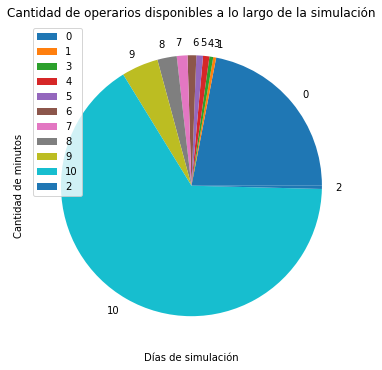

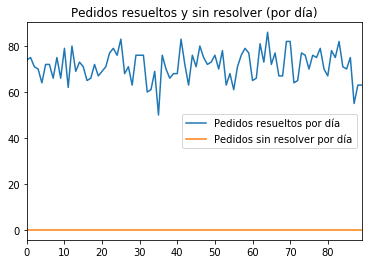

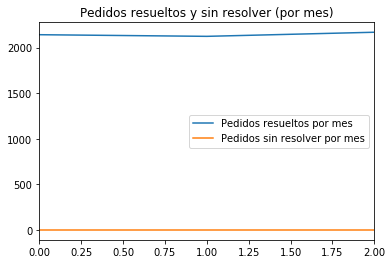

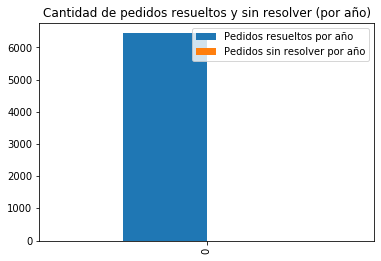

In [8]:
tab = create_tab()
btn = create_button()
btn.on_click(on_button_clicked(tab))
display(tab, btn)